In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

df = pd.read_csv("diabetic_data.csv")

In [5]:
print(df.head())

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [6]:
df.replace("?",pd.NA,inplace = True)

In [7]:
missing_values = df.isnull().sum()

In [29]:
print("no of missing values :" , missing_values[missing_values > 0])


no of missing values : race                          352
weight                      21533
payer_code                  22242
medical_specialty            8797
diag_1                          8
diag_2                        127
diag_3                        606
max_glu_serum               19874
A1Cresult                   18158
acetohexamide                   1
glipizide                       1
glyburide                       1
tolbutamide                     1
pioglitazone                    1
rosiglitazone                   1
acarbose                        1
miglitol                        1
troglitazone                    1
tolazamide                      1
examide                         1
citoglipton                     1
insulin                         1
glyburide-metformin             1
glipizide-metformin             1
glimepiride-pioglitazone        1
metformin-rosiglitazone         1
metformin-pioglitazone          1
change                          1
diabetesMed              

In [9]:
df['race'] = df['race'].fillna('unknown')

In [10]:
print(df['race'].isnull().sum())

0


In [11]:
print(df['race'].value_counts())

race
Caucasian          16233
AfricanAmerican     4765
Hispanic             493
unknown              352
Other                312
Asian                 91
Name: count, dtype: int64


In [12]:
duplicates = df.duplicated().sum()
print("number of duplicates ",duplicates)

number of duplicates  0


**•	Perform descriptive statistical analysis for numerical features **

In [13]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,2.224600e+04,2.224600e+04,22246.000000,22246.000000,22246.000000,22246.000000,22246.000000,22246.000000,22246.000000,22246.000000,22246.000000,22246.000000,22246.000000
mean,4.466954e+07,2.518494e+07,2.330307,5.728760,6.823699,4.715095,45.555201,1.438056,15.286344,0.138182,0.063607,0.580419,6.812506
std,2.046417e+07,3.205391e+07,1.741058,7.153015,5.038483,3.142501,18.213957,1.751654,8.152569,0.674329,0.445299,1.148369,2.045789
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.874324e+07,2.778289e+06,1.000000,1.000000,2.000000,2.000000,34.000000,0.000000,10.000000,0.000000,0.000000,0.000000,5.000000
50%,4.631451e+07,1.112070e+07,2.000000,1.000000,7.000000,4.000000,46.000000,1.000000,14.000000,0.000000,0.000000,0.000000,7.000000
75%,6.229653e+07,2.551864e+07,3.000000,6.000000,7.000000,6.000000,58.000000,2.000000,19.000000,0.000000,0.000000,1.000000,9.000000
max,7.681651e+07,1.151968e+08,8.000000,25.000000,20.000000,14.000000,129.000000,6.000000,63.000000,20.000000,25.000000,15.000000,9.000000


In [14]:
df.dtypes

,0
encounter_id,int64
patient_nbr,int64
race,object
gender,object
age,object
weight,object
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
time_in_hospital,int64


**•	Visualize the distribution of categorical features - race and gender**

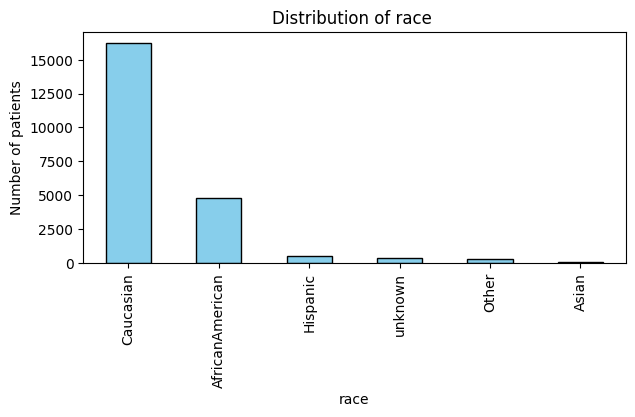

In [15]:
plt.figure(figsize = (7,3))
df['race'].value_counts().plot(kind ='bar',color = 'skyblue',edgecolor  =  'black')
plt.title("Distribution of race ")
plt.xlabel("race")
plt.ylabel("Number of patients")
plt.show()


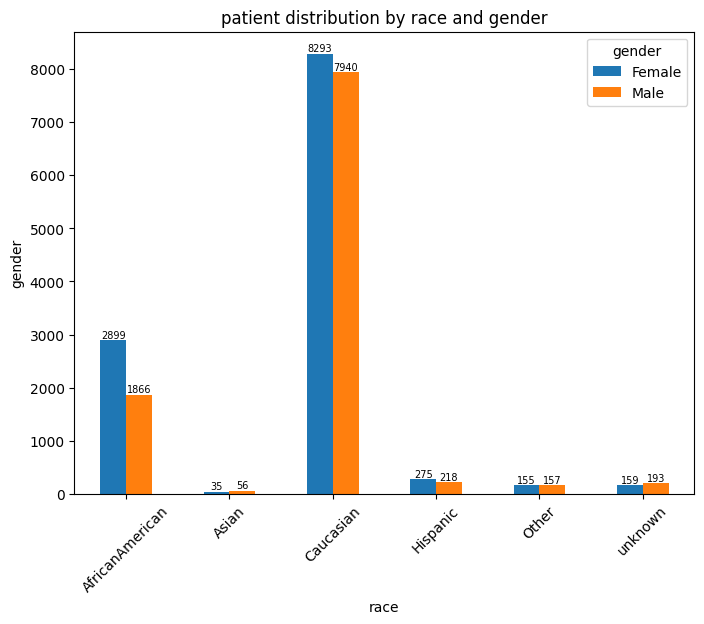

In [16]:
a = pd.crosstab(df['race'],df['gender']).plot(kind = 'bar',figsize = (8,6))
plt.title("patient distribution by race and gender")
plt.xlabel('race')
plt.ylabel('gender')
plt.xticks(rotation = 45)
plt.legend(title = 'gender')
for container in a.containers:
  a.bar_label(container,label_type = 'edge',fontsize = 7)

plt.show()

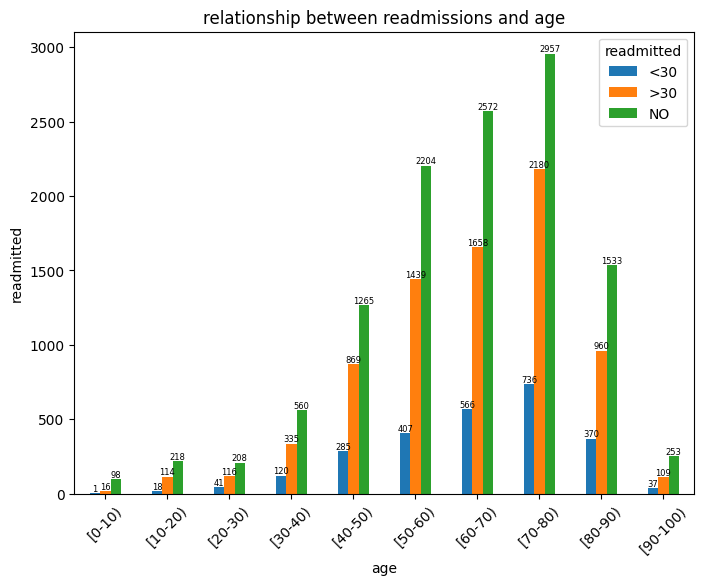

In [17]:
p = pd.crosstab(df['age'],df['readmitted']).plot(kind = 'bar',figsize= (8,6))
plt.title("relationship between readmissions and age")
plt.xlabel('age')
plt.ylabel('readmitted')
plt.xticks(rotation = 45)
plt.legend(title = 'readmitted')
for container in p.containers:
  p.bar_label(container,label_type = 'edge',fontsize = 6)

plt.show()

**Investigate correlations between numerical features**


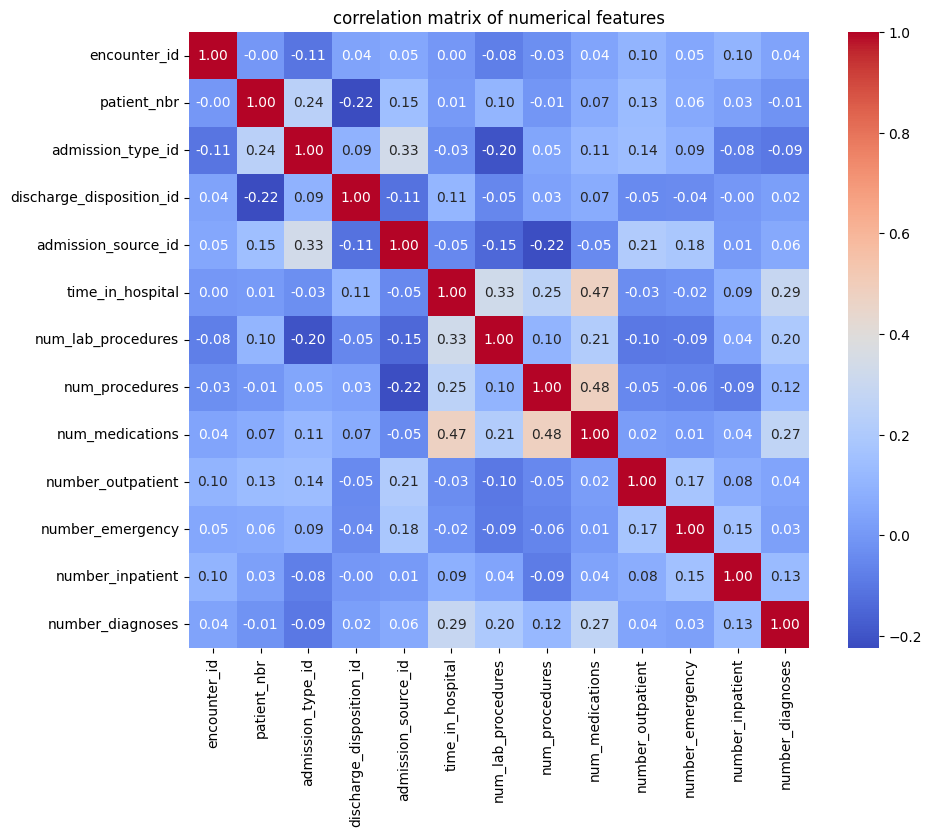

In [30]:
numerical_cols = df.select_dtypes(include = ['int64','float64'])
corr_matrix = numerical_cols.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix,annot = True,cmap = "coolwarm",fmt = ".2f",cbar = True)
plt.title("correlation matrix of numerical features")
plt.show()


**Analyze the distribution of medication changes and total medications taken**

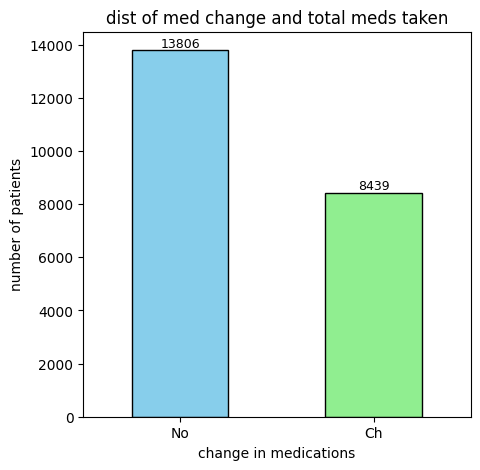

In [19]:
import matplotlib.pyplot as plt

change_counts = df["change"].value_counts()


p=change_counts.plot(kind='bar',color=["skyblue","lightgreen"],edgecolor="Black",figsize=(5,5))
plt.title("dist of med change and total meds taken")
plt.xlabel("change in medications")
plt.ylabel("number of patients")
plt.xticks(rotation=0)
for container in p.containers:
  p.bar_label(container,label_type='edge',fontsize=9)
plt.show()

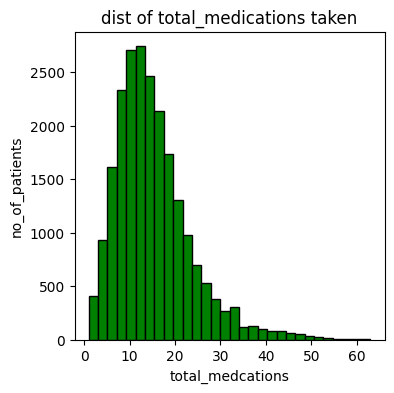

In [31]:
plt.figure(figsize = (4,4))
ax=plt.hist(df['num_medications'],bins = 30,color = 'green',edgecolor = 'black')
plt.title('dist of total_medications taken')
plt.xlabel('total_medcations')
plt.ylabel('no_of_patients')

plt.show()

**• Examine the distribution of diagnoses categories**

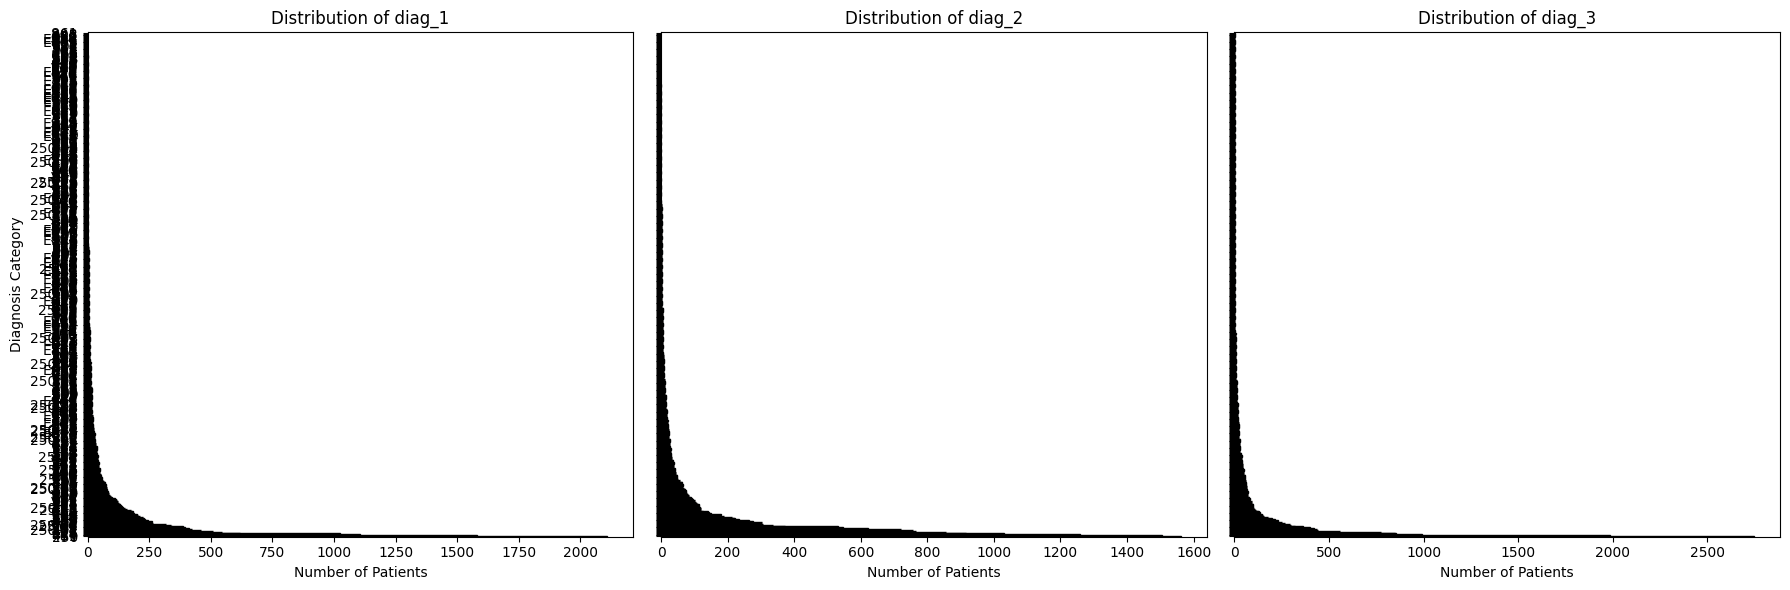

In [21]:


fig, axes = plt.subplots(1, 3, figsize=(18,6), sharey=True)

for i, col in enumerate(['diag_1','diag_2','diag_3']):
    df[col].value_counts().plot(kind='barh', ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel("Number of Patients")
    axes[i].set_ylabel("Diagnosis Category")

plt.tight_layout()
plt.show()

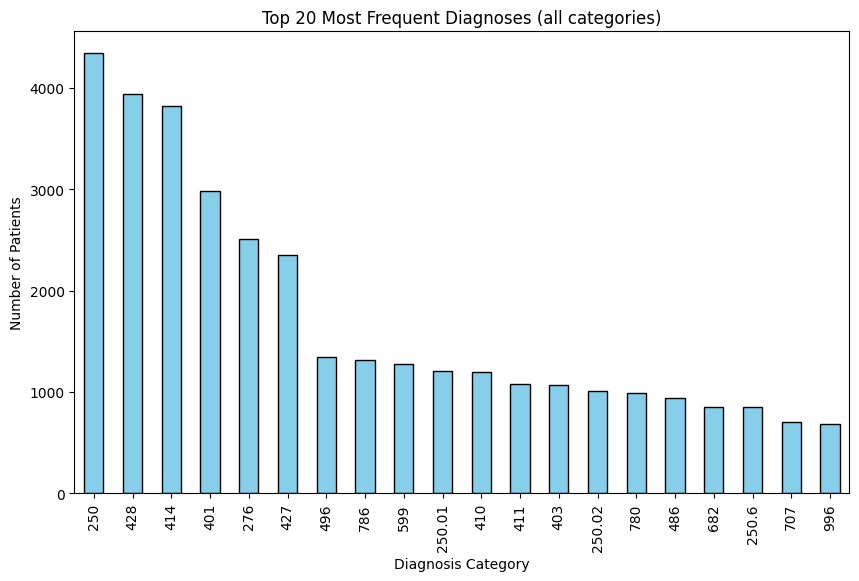

In [22]:
plt.figure(figsize=(10,6))

# stack diag_1, diag_2, diag_3 into one column
all_diags = pd.concat([df['diag_1'], df['diag_2'], df['diag_3']])

all_diags.value_counts().head(20).plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Top 20 Most Frequent Diagnoses (all categories)")
plt.xlabel("Diagnosis Category")
plt.ylabel("Number of Patients")
plt.xticks(rotation=90)
plt.show()


• Explore the distribution of patients across admission types, sources, and discharge
dispositions


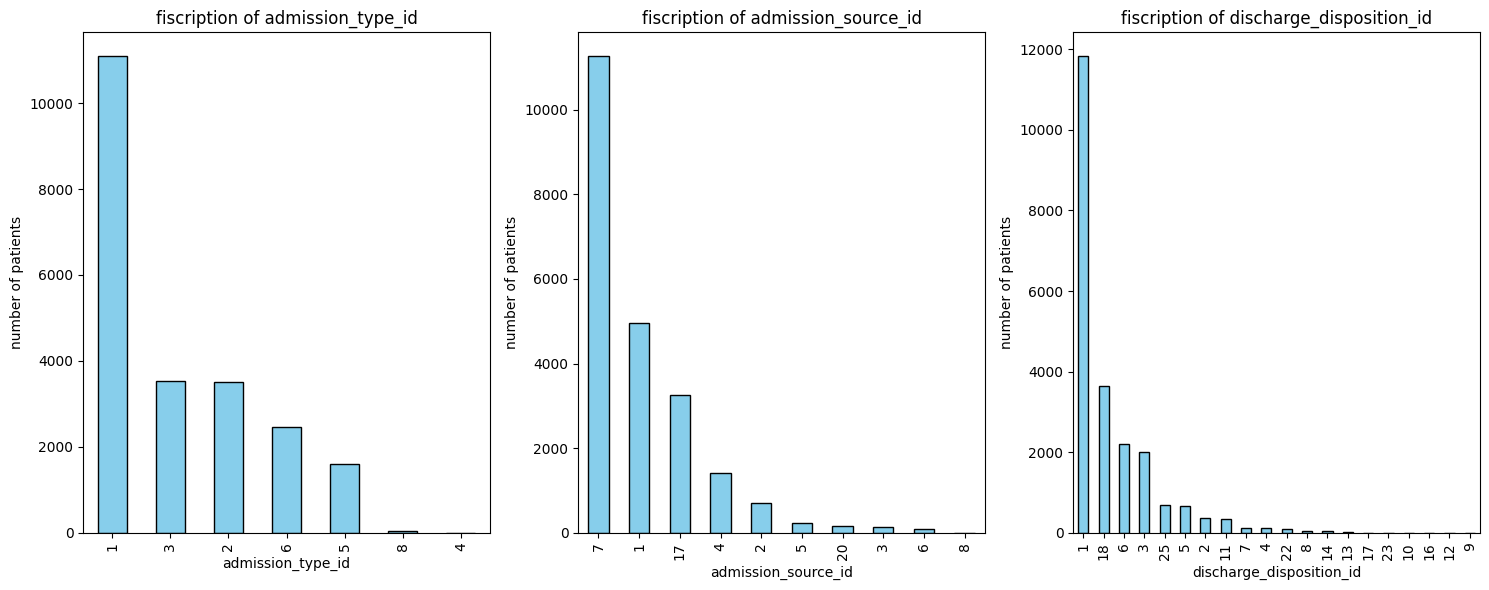

In [23]:
cols = ['admission_type_id','admission_source_id','discharge_disposition_id']
fig,axes = plt.subplots(1,3,figsize = (15,6))

for i,col in enumerate(cols):
  df[col].value_counts().plot(kind = 'bar',ax = axes[i],color = 'skyblue',edgecolor = 'black')
  axes[i].set_title(f"fiscription of {col}")
  axes[i].set_xlabel(col)
  axes[i].set_ylabel("number of patients")
  axes[i].tick_params(axis = 'x',rotation = 90)

plt.tight_layout()
plt.show()

• Identify and visualize any outliers in the dataset, especially in numerical features

In [24]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
print("Numerical columns are:", num_cols.tolist())


Numerical columns are: ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


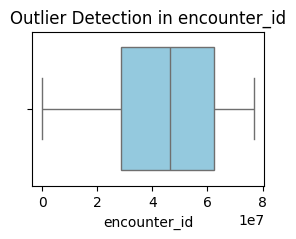

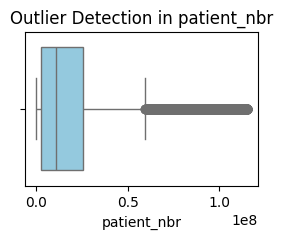

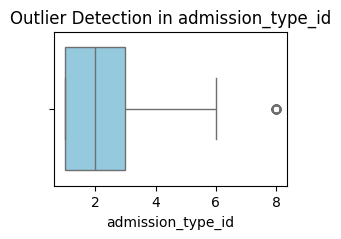

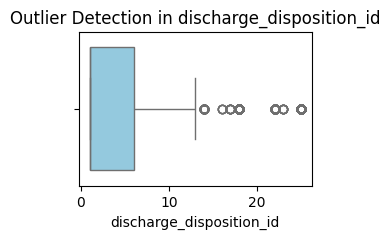

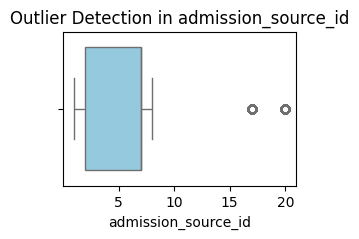

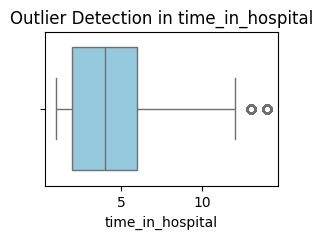

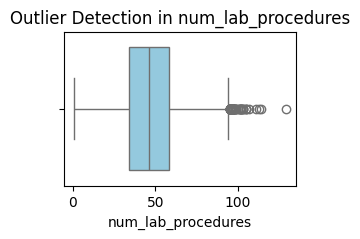

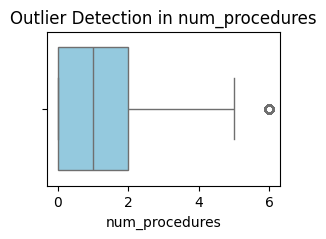

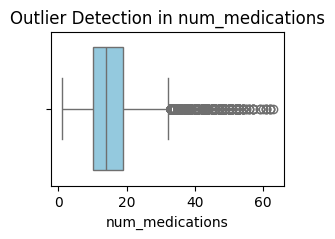

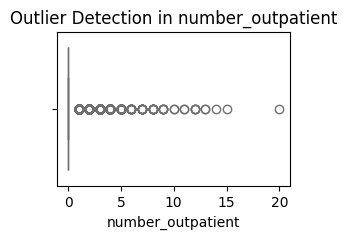

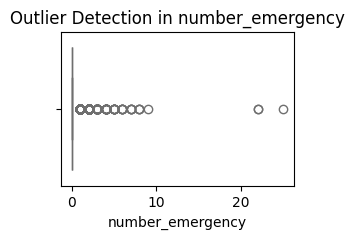

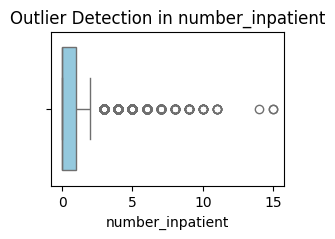

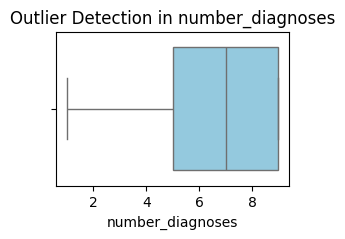

In [32]:
for col in num_cols:
    plt.figure(figsize=(3,2))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Outlier Detection in {col}")
    plt.show()


In [26]:


# Dictionary to store outliers for each column
outliers = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Store outlier rows for this column
    outliers[col] = df[(df[col] < lower) | (df[col] > upper)][col]

# Print summary of outliers found
for col, vals in outliers.items():
    print(f"\nOutliers in {col}: {len(vals)} rows")
    print(vals.head())



Outliers in encounter_id: 0 rows
Series([], Name: encounter_id, dtype: int64)

Outliers in patient_nbr: 3962 rows
2     86047875
3     82442376
5     82637451
6     84259809
7    114882984
Name: patient_nbr, dtype: int64

Outliers in admission_type_id: 39 rows
7789    8
8080    8
8387    8
8718    8
8759    8
Name: admission_type_id, dtype: int64

Outliers in discharge_disposition_id: 4522 rows
0      25
117    25
118    25
121    25
122    25
Name: discharge_disposition_id, dtype: int64

Outliers in admission_source_id: 3423 rows
469    20
564    20
592    20
596    20
599    20
Name: admission_source_id, dtype: int64

Outliers in time_in_hospital: 645 rows
8      13
42     13
73     14
114    14
135    13
Name: time_in_hospital, dtype: int64

Outliers in num_lab_procedures: 62 rows
106     96
336    103
613     95
623     97
823    105
Name: num_lab_procedures, dtype: int64

Outliers in num_procedures: 1084 rows
5      6
120    6
147    6
155    6
221    6
Name: num_procedures, dtyp

# Analysis Report: Exploratory Data Analysis of Diabetes Patient Data

This report summarizes the key findings from the exploratory data analysis performed on the provided diabetes patient dataset. The analysis aimed to understand the data's structure, identify missing values and outliers, and visualize the distributions and relationships of key features, particularly in the context of readmissions.

**Data Overview and Missing Values:**

The dataset contains information on various aspects of patient encounters, including demographics, hospital details, diagnoses, medications, and readmission status. Initial inspection revealed the presence of missing values, notably in the 'weight', 'payer_code', and 'medical_specialty' columns. The 'race' column also had a significant number of missing values, which were subsequently imputed with 'unknown'.

**Duplicate Records:**

No duplicate patient encounter records were found in the dataset.

**Descriptive Statistics:**

Descriptive statistics for the numerical features provided insights into their central tendency, dispersion, and range. Features like time_in_hospital, num_lab_procedures, and num_medications showed variations, while others like encounter_id and patient_nbr served as identifiers.

**Distribution of Categorical Features:**

Race: The majority of patients in the dataset are Caucasian, followed by African American. There is a smaller proportion of patients from other racial groups, including the imputed 'unknown' category.
Gender: The dataset primarily consists of female and male patients, with a very small number of 'Unknown/Invalid' entries. The distribution of gender within each racial group was also visualized, showing a consistent pattern across races with slightly more female patients than male patients in most categories.
Relationship between Readmissions and Age:

The analysis of readmission status across different age groups revealed some interesting patterns. Patients in older age groups ([60-70), [70-80), and [80-90)) appear to have a higher number of readmissions compared to younger age groups. This suggests age could be a factor influencing readmission rates.

**Correlation between Numerical Features:**

The correlation matrix of numerical features indicated some moderate positive correlations, such as between time_in_hospital and num_medications, and num_lab_procedures and num_medications. This is expected, as longer hospital stays and more lab tests often correlate with a higher number of medications prescribed. Other correlations were weak, suggesting limited linear relationships between most numerical features.

**Distribution of Medication Changes and Total Medications:**

Medication Change: The dataset shows a near-even split between patients who had a change in their medications ('Ch') and those who did not ('No').
Total Medications: The distribution of the total number of medications taken by patients is skewed towards lower numbers, with a peak around 10-20 medications. There is a long tail extending to higher numbers of medications, indicating some patients are on a large number of drugs.

**Distribution of Diagnoses Categories:**

Visualizing the distributions of diag_1, diag_2, and diag_3 revealed a large number of unique diagnosis codes, with a few codes appearing much more frequently than others. Combining all diagnosis categories and looking at the top 20 most frequent diagnoses confirmed that a small subset of diagnoses accounts for a significant portion of the patient population.

**Distribution of Admission and Discharge Information:**

The distributions of admission_type_id, admission_source_id, and discharge_disposition_id show that the majority of patients fall into a few key categories for each of these features. This highlights the most common pathways for patient admission and discharge in this dataset.

**Outlier Detection:**

Box plots and outlier counts for numerical features indicated the presence of outliers in several columns, including admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, and number_diagnoses. These outliers represent values that are significantly different from the majority of the data and may warrant further investigation or specific handling during modeling.

Next Steps:

**Based on this EDA, the next steps could involve:**

**Handling Missing Values:**
 Develop a strategy to address the remaining missing values in columns like 'weight', 'payer_code', and 'medical_specialty'. This could involve imputation, removal of rows/columns, or other techniques depending on the nature and extent of the missingness.
**Feature Engineering:**
 Create new features that could be relevant for predicting readmissions, such as combining diagnosis codes into broader categories or creating indicators for multiple hospital visits.
**Feature Selection:** Based on the EDA and potential correlations, consider which features are most likely to be predictive of readmission and potentially remove less relevant ones.
**Addressing Outliers:**
 Decide on a strategy for handling the identified outliers in numerical features. This could involve transformation, capping, or removal, depending on the specific feature and the chosen modeling approach.
**Model Building:** Proceed with building a predictive model for readmission based on the cleaned and prepared data. This would involve selecting an appropriate model, training it on the data, and evaluating its performance.
This EDA provides a solid foundation for building a fraud detection system by highlighting key characteristics of the data and potential areas of focus for feature engineering and model development.
